# Getting started with packages and data
1. Understanding of the problem: The project aims to compare different models for next day rainfall prediction.
2. Conversion of problem to AI task: The problem is Classification based problem where the goal is to classify instances based on their likelihood of rainfall
3. Data Acquisition: The data used in the project is acquired from https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [1]:
#Initial packages
import numpy as np
import pandas as pd
#Visualization package
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing packages
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
#Model selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import tensorflow as tf
from scikeras.wrappers import KerasClassifier
#For evaluation
from sklearn.metrics import accuracy_score, classification_report

#SEED for any random state
SEED = 42

In [2]:
data = pd.read_csv('weatherAUS.csv')
pd.set_option('display.max_columns',None)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Removal of inessential features**

In a GitHub repository that inspired this project, the date column was removed. However, in this study, the date column will be feature engineered to extract seasonal information. This will provide additional context to the models, potentially enhancing its prediction accuracy for rainfall.

# Preprocessing:
1. Data description: Statistical descriptions such as mean, standard deviation, min, max, and median of variables will be analyzed to understand the trend of the data.
2. Data Cleaning: Removal of missing data
3. Feature Engineering: The date data will be converted to seasonal information to feed more information, thus enhancing prediction accuracy of the models
4. Handling Text Data and Categorical Attributes: Categorical data, such as seasonal info, wind direction, rain today and rain tomorrow will be encoded using techniques like LabelEncoding and OneHotEncoding
5. Data splitting: Splitting entire data into train and test.
**NOTE: Always split before scale to ensure no information leakage**
6. Visualization and Correlation: Visualization and Correlation of rainfall tomorrow with other features
7. Data scaling: Scaling of the data using RobustScaler 

In [3]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
len(data)

145460

In [6]:
data = data.dropna()
data.reset_index(inplace=True)
data.isnull().sum()

index            0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
len(data)
#Removal of NaNs reduced the dataset to approximately 40% of the original, becoming about 2.5 times smaller

56420

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
def create_seasonal_col(date):
    month = date.month
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        raise ValueError('Invalid month in the dataframe')

In [10]:
data['Season'] = data['Date'].apply(create_seasonal_col)
columns = ['Season'] + [col for col in data.columns if col != 'Season' and col != 'Date'] 
data = data[columns]

In [11]:
data.head()

,Season,index,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Winter,6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
1,Winter,6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2,Winter,6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
3,Winter,6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
4,Winter,6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [12]:
label_enc = LabelEncoder()
label_enc_col = ['RainToday','RainTomorrow']
one_hot_enc_col = ['Season','Location','WindGustDir','WindDir9am','WindDir3pm']
for column in label_enc_col:
    data[column] = label_enc.fit_transform(data[column])


for column in one_hot_enc_col:
    dummies = pd.get_dummies(data[column],dtype=float)
    data = pd.concat([data,dummies],axis=1)
    data.drop(column,axis=1,inplace=True)

In [13]:
data.head()

,index,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Autumn,Spring,Summer,Winter,AliceSprings,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Darwin,Hobart,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,NorfolkIsland,Nuriootpa,Perth,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
#Split into train and test
train, test = train_test_split(data,test_size=0.2,random_state=SEED)
(train_X, train_y), (test_X, test_y) = [(x.drop('RainTomorrow',axis=1),x['RainTomorrow']) for x in [train,test]]

In [15]:
attributes = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday','RainTomorrow']
train_data = pd.DataFrame()
for col in attributes:
    train_data[col] = train[col]

corr_matrix = train_data.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.455901
Cloud3pm         0.388202
Cloud9am         0.324867
RainToday        0.311770
Humidity9am      0.271123
Rainfall         0.252464
WindGustSpeed    0.234731
MinTemp          0.086573
WindSpeed9am     0.085794
Temp9am         -0.020376
Evaporation     -0.129203
MaxTemp         -0.149035
Temp3pm         -0.185690
Pressure3pm     -0.229900
Pressure9am     -0.254727
Sunshine        -0.453166
Name: RainTomorrow, dtype: float64

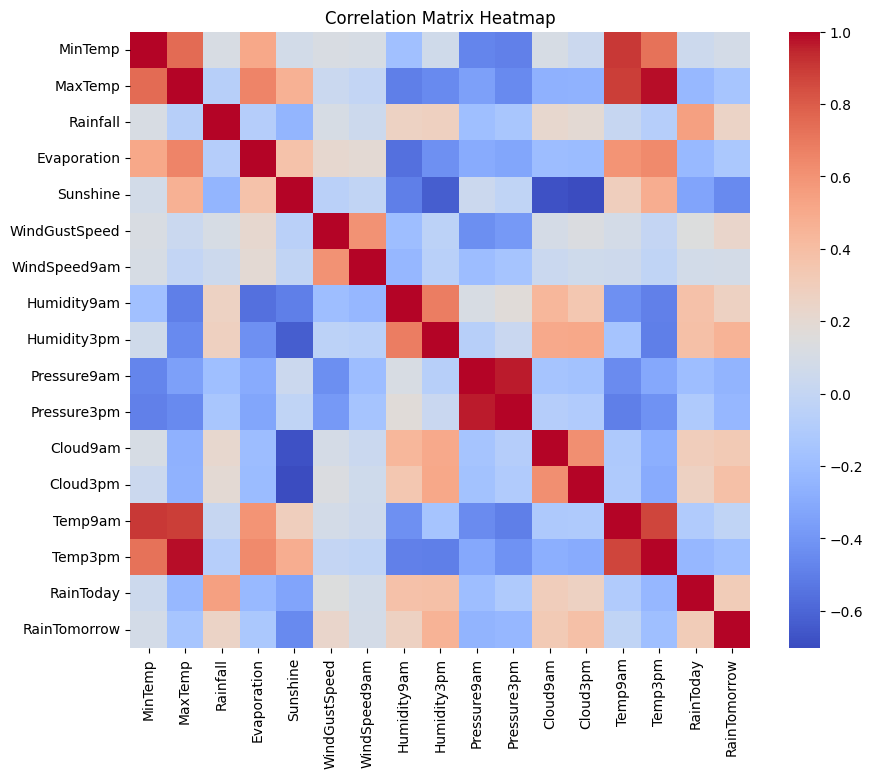

In [16]:
# Heat Map for visualization
plt.figure(figsize=(10, 8)) 
sns.heatmap(corr_matrix, cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap') 
plt.show()

In [17]:
#Data Scaling
scaler = RobustScaler()
train_X = pd.DataFrame(scaler.fit_transform(train_X),columns=train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X),columns=test_X.columns)

# Model Development
1. Model Selection: KNN Classifier, RF Classifier, ANN
2. Loss function: Categorical Cross-Entropy
3. Model Training and Tuning: K-Fold Cross validation and Random Search for Hyperparameter Tuning for kNN and RF, while fixed parameters for ANN

In [18]:
#Define Models
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = SEED)

inputs = tf.keras.Input(shape=(96,))
x = tf.keras.layers.Dense(16,activation='relu')(inputs)
x = tf.keras.layers.Dense(16,activation='relu')(x)
outputs = tf.keras.layers.Dense(2,activation='softmax')(x)
ann = tf.keras.Model(inputs=inputs,outputs=outputs)
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


knn_param_grid = { 'n_neighbors': np.arange(1, 101), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski'] }
rf_param_grid = { 'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)], 'max_features': [ 'sqrt', 'log2'], 'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False] }

#k-fold cv
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#Random Search initialization
knn_random_search = RandomizedSearchCV( estimator=knn, param_distributions=knn_param_grid, n_iter=5, cv=kfold, random_state=SEED)
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=rf_param_grid, n_iter=5, cv=kfold, random_state=SEED)


In [19]:
knn_random_search.fit(train_X, train_y)
knn_best_params = knn_random_search.best_params_
print("Best Parameters:", knn_best_params)
knn_best_model = knn_random_search.best_estimator_

Best Parameters: {'weights': 'distance', 'n_neighbors': np.int64(36), 'metric': 'euclidean'}


In [20]:
rf_random_search.fit(train_X, train_y)
rf_best_params = rf_random_search.best_params_
print("Best Parameters:", rf_best_params)
rf_best_model = rf_random_search.best_estimator_

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}


In [21]:
EPOCHS = 10
BATCH_SIZE = 32
ann.fit(train_X, train_y, validation_split = 0.2, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = 1)

Epoch 1/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.7933 - loss: 0.4319 - val_accuracy: 0.8512 - val_loss: 0.3392
Epoch 2/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8575 - loss: 0.3281 - val_accuracy: 0.8559 - val_loss: 0.3291
Epoch 3/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8611 - loss: 0.3166 - val_accuracy: 0.8587 - val_loss: 0.3234
Epoch 4/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8649 - loss: 0.3111 - val_accuracy: 0.8574 - val_loss: 0.3218
Epoch 5/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8621 - loss: 0.3078 - val_accuracy: 0.8573 - val_loss: 0.3224
Epoch 6/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8641 - loss: 0.3053 - val_accuracy: 0.8598 - val_loss: 0.3198
Epoch 7/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8660 - loss: 0.3042 - val_accuracy: 0.8582 - val_loss: 0.3205
Epoch 8/10
1129/1129 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8681 - loss: 0.2991 -

# Performance Comparison and Analysis
1. Comparison of best models
2. Outcome Interpretation

In [22]:
#kNN best params
knn_best_params = {'weights': 'distance', 'n_neighbors': np.int64(36), 'metric': 'euclidean'}
knn_model = KNeighborsClassifier(**knn_best_params)
knn_model.fit(train_X, train_y)
knn_pred = knn_model.predict(test_X)
accuracy = accuracy_score(test_y, knn_pred)
report = classification_report(test_y, knn_pred)
print(f'Accuracy: {accuracy}') 
print('Classification Report:') 
print(report)

Accuracy: 0.8443814250265863
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8799
           1       0.75      0.44      0.55      2485

    accuracy                           0.84     11284
   macro avg       0.80      0.70      0.73     11284
weighted avg       0.83      0.84      0.83     11284



In [23]:
#RF best params
rf_best_params = {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': False}
rf_model = RandomForestClassifier(**rf_best_params,random_state=SEED)
rf_model.fit(train_X, train_y)
rf_pred = rf_model.predict(test_X)
accuracy = accuracy_score(test_y, rf_pred)
report = classification_report(test_y, rf_pred)
print(f'Accuracy: {accuracy}') 
print('Classification Report:') 
print(report)

Accuracy: 0.8640552995391705
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8799
           1       0.78      0.53      0.63      2485

    accuracy                           0.86     11284
   macro avg       0.83      0.74      0.77     11284
weighted avg       0.86      0.86      0.85     11284



In [24]:
ann_pred = ann.predict(test_X)
ann_pred = list(map(lambda x:np.argmax(x),ann_pred))
accuracy = accuracy_score(test_y, ann_pred)
report = classification_report(test_y, ann_pred)
print(f'Accuracy: {accuracy}') 
print('Classification Report:') 
print(report)

353/353 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8624601205246366
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8799
           1       0.74      0.58      0.65      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.76      0.78     11284
weighted avg       0.86      0.86      0.86     11284



# **Conclusion**
The study shown that RF and ANN shown similar precision, recall, and f1-score, demonstrating both models could predict equally if rainfall will occur tomorrow. However, the study could have been benefited with additional computational resources. For instance, no hyperparameter tuning for ANN or shap analysis was performed in this study because of lack of computational resources.